In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [bayesian_optimization, bfgs, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]

### The benchmark functions

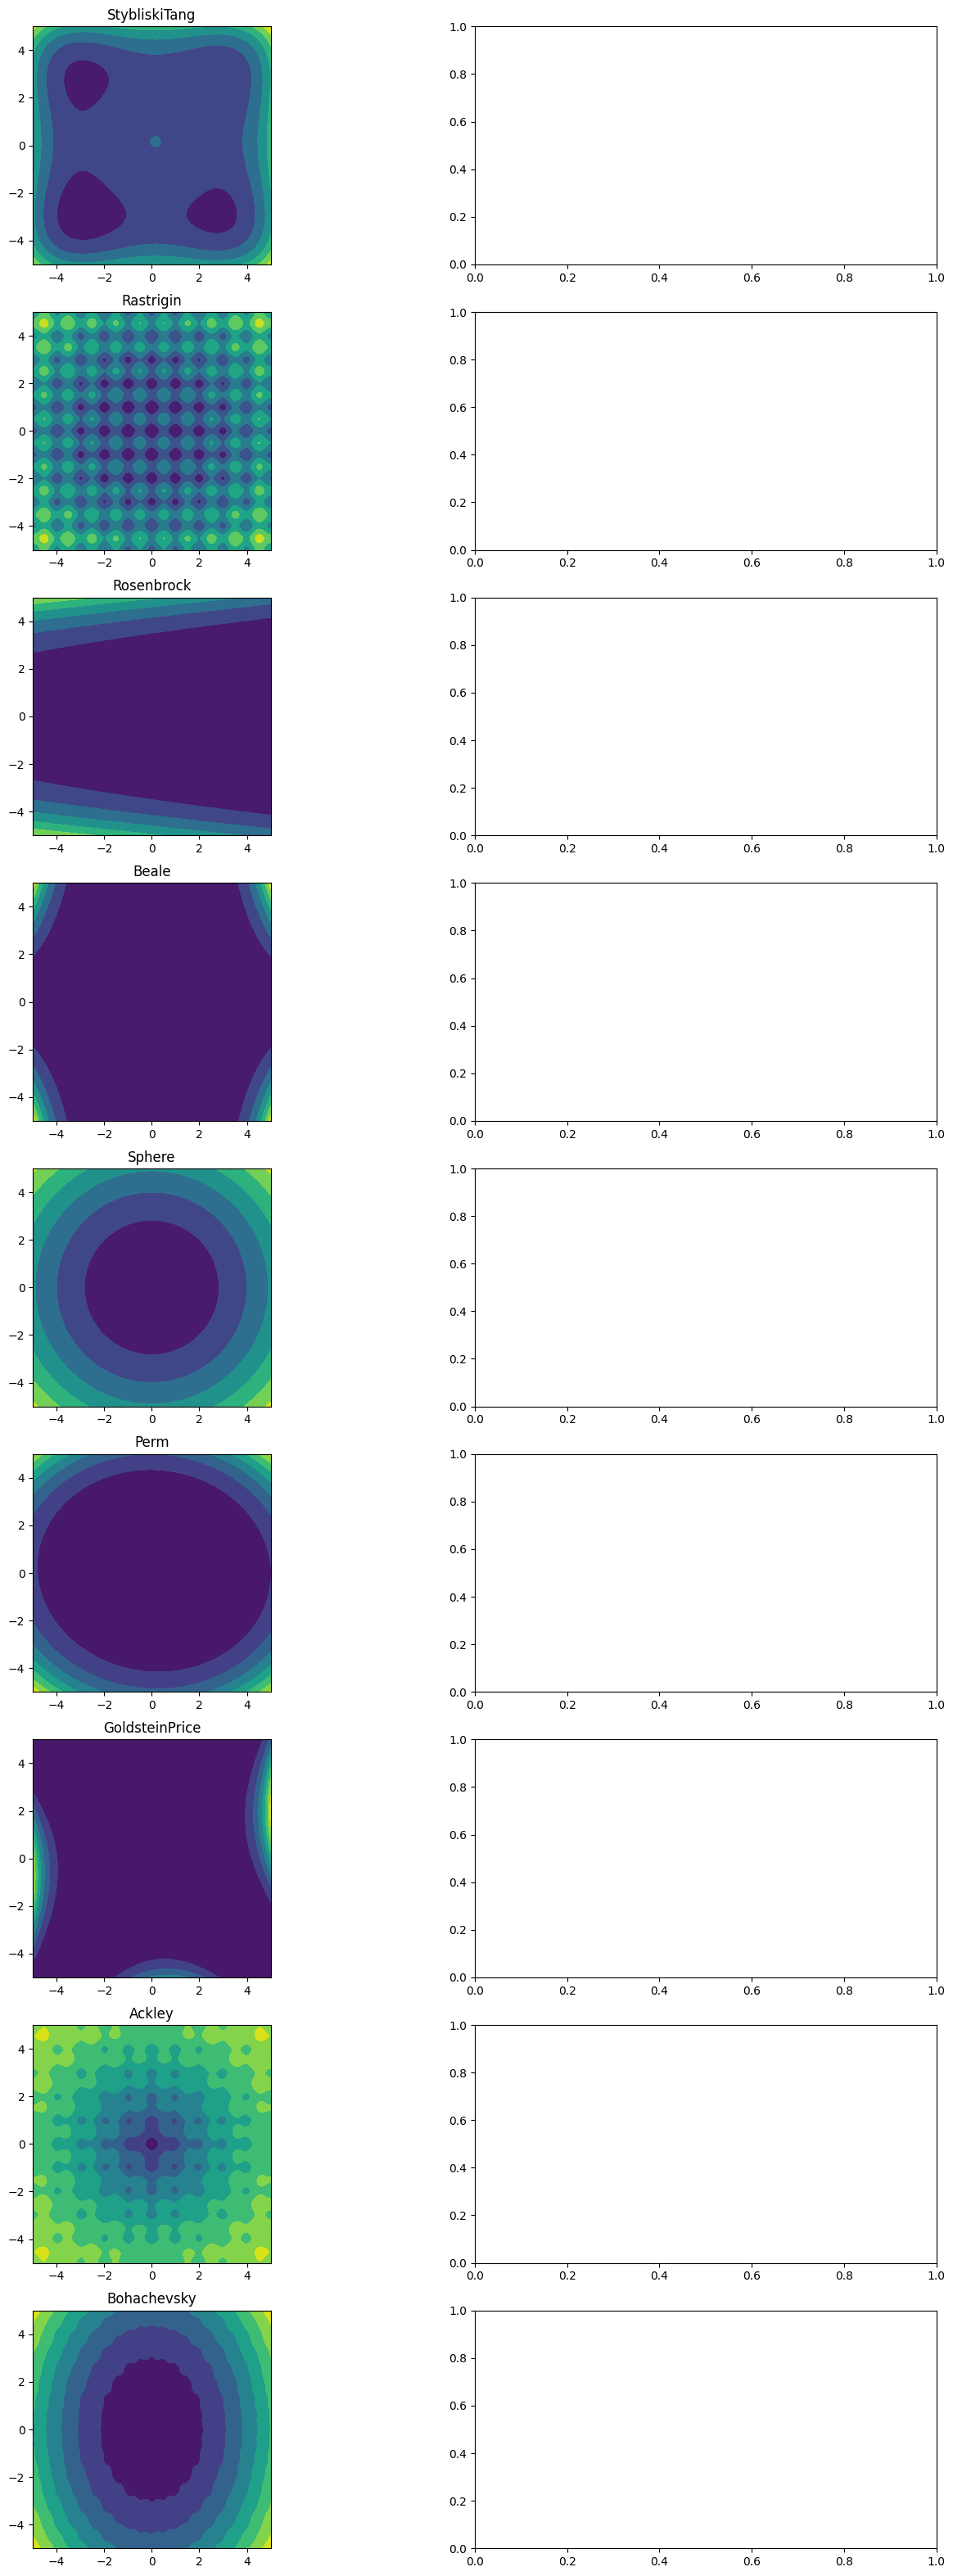

In [2]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).T

fig, ax = plt.subplots(len(benchmarkfunction_list), 2, figsize=(16,40))

for idx, fun in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fun(points).reshape(101,101)

    ax[idx,0].contourf(X1,X2,Fx)
    ax[idx,0].axis('scaled')
    ax[idx,0].set_title(fun.__name__)

plt.show()

### Algorithms on test_function

In [7]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2

tests = 200


data = ["Benchmark function"] + [f.__name__ for f in algorithms_list]

for el in (data):
    print(f"|{el:<21}",end=" ")
print("|")
print(f"{'-' * 21 *(len(data)) + '-'*(len(data) + 1)}")

for test_function in benchmarkfunction_list:

    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    #print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")

    results = np.zeros(len(algorithms_list))

    for _ in range(tests):
        # Define the intial set of points
        initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])

        for idx, fun in enumerate(algorithms_list):

            if   (idx == 0): # Bayesian Optmization
                X_best, Y_best, X, Y = fun(test_function, X=initial_x, dimension=dimension, n_samples=n_samples, sampling_budget=budget, low=-5, high=5)

            elif (idx == 1): # BFGS
                #X_best, Y_best, X, Y = fun(test_function, x0=initial_x[:,0], x1=initial_x[:,1], sampling_budget=budget, tol=10e-6)
                pass
            elif (idx == 2): # Latin Hypercube
                X_best, Y_best, X, Y = fun(test_function, n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
                
            elif (idx == 3): # Nelder Mead
                X_best, Y_best, X, Y = fun(test_function, x0 = initial_x[:,0], low=-5, high=5, step=0.1, no_improve_thr=10e-6, no_improv_break=10, sampling_budget=budget, alpha=1., gamma=2., rho=-0.5, sigma=0.5)
                
            elif (idx == 4): # Particle Swarm
                X_best, Y_best, X, Y = fun(test_function, X=initial_x, V=None, dimension=dimension, low=-5, high=5, sampling_budget=budget, n_particles=n_samples, tol=10e-6, c1=0.1, c2=0.1, w=0.8)
                
            elif (idx == 5): # Response Surface Modeling
                #X_best, Y_best, X, Y = fun(test_function, x0=initial_x[:,0], sampling_budget=budget, tol = 1e-8, sampling_method="box_behnken", sampling_bound=0.5, iteration_method="gradient", learning_rate=0.01)
                pass
            elif (idx == 6): # Sobol
                X_best, Y_best, X, Y = fun(test_function, n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
            results[idx] += (Fmin - Y_best)
    
    results /= tests
    print(f"{test_function.__name__:<21}|", end=" ")
    for r in (results): print(f"|{r:<21}",end=" ")
    print("|")
            

|Benchmark function    |bayesian_optimization |bfgs                  |latin_hypercube       |nelder_mead           |particle_swarm        |response_surface      |sobol                 |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
StybliskiTang         |-0.4963432020524076   |-0.4963432020524076   |-4.31809125           |-18.275458046463715   |-7.355829237647357    |-7.355829237647357    |-0.005306660556797738 
Rastrigin             |-4.1460029017946525   |-4.1460029017946525   |-5.138408360720941    |-15.74294405137192    |-4.739629212836543    |-4.739629212836543    |0.0                   
Rosenbrock            |-0.7512446085350943   |-0.7512446085350943   |-3.805225000000002    |-53.831907649361234   |-8.20993241410822     |-8.20993241410822     |-1.0                  
Beale                 |-0.3292272992680001   |-0.3292272992680001   |-0.719020537932